In [52]:
import pandas as pd

In [53]:
BASE_DIR = '/home/matteo/Documents/postDoc/CTTC/HHAR/'
accelerometer = 'Phones_accelerometer.csv'
gyroscope = 'Phones_gyroscope.csv'

In [54]:
df_accelerometer = pd.read_csv(BASE_DIR + accelerometer)

In [55]:
df_gyroscope = pd.read_csv(BASE_DIR + gyroscope)

In [56]:
df_accelerometer.columns

Index(['Index', 'Arrival_Time', 'Creation_Time', 'x', 'y', 'z', 'User',
       'Model', 'Device', 'gt'],
      dtype='object')

In [57]:
df_accelerometer["Model"].unique()

array(['nexus4', 's3', 's3mini', 'samsungold'], dtype=object)

In [58]:
print(len(df_accelerometer))
print(len(df_gyroscope))
print(len(df_accelerometer) - len(df_gyroscope))

13062475
13932632
-870157


<Axes: xlabel='gt'>

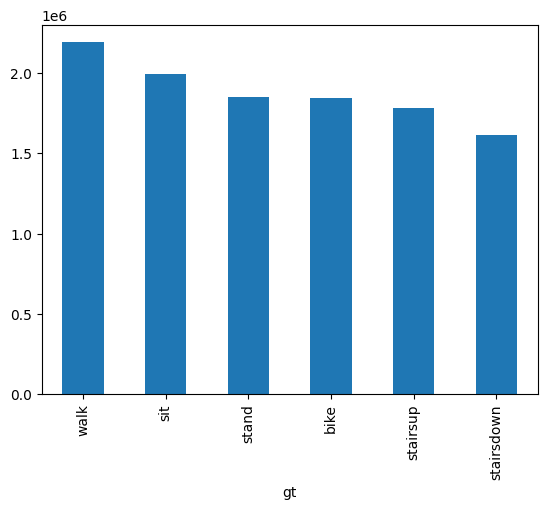

In [59]:
df_accelerometer["gt"].value_counts()
# plot histogram of the classes
df_accelerometer["gt"].value_counts().plot(kind='bar')

<Axes: xlabel='gt'>

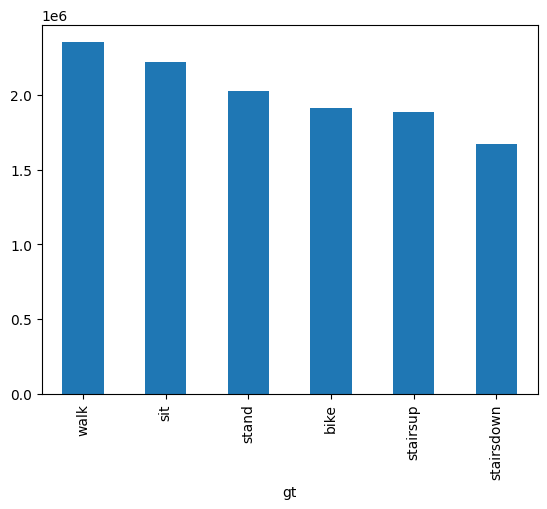

In [60]:
df_gyroscope["gt"].value_counts()
# plot histogram of the classes
df_gyroscope["gt"].value_counts().plot(kind='bar')

In [61]:
df_accelerometer

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand
...,...,...,...,...,...,...,...,...,...,...
13062470,129048,1424778553315,92263781761000,1.379043,0.153227,9.959755,i,samsungold,samsungold_2,bike
13062471,129049,1424778553346,92263812248000,1.379043,0.153227,9.806528,i,samsungold,samsungold_2,bike
13062472,129050,1424778553366,92263832267000,1.532270,0.153227,9.806528,i,samsungold,samsungold_2,bike
13062473,129051,1424778553386,92263852409000,1.532270,0.000000,9.959755,i,samsungold,samsungold_2,bike


In [62]:
df_accelerometer["Arrival_Time"] - df_gyroscope["Arrival_Time"][:len(df_accelerometer)]

0                -1
1                 0
2                 0
3                 0
4                 1
             ...   
13062470    1773462
13062471    1773484
13062472    1773502
13062473    1773518
13062474    1773522
Name: Arrival_Time, Length: 13062475, dtype: int64

In [63]:
a = abs(df_accelerometer["Creation_Time"] - df_gyroscope["Creation_Time"][:len(df_accelerometer)])
a

0                   793457
1                   762940
2                   762939
3                   732422
4                   793457
                 ...      
13062470    39755095770000
13062471    39755070282000
13062472    39755055255000
13062473    39755040138000
13062474    39755035684000
Name: Creation_Time, Length: 13062475, dtype: int64

In [64]:
for i in range(len(a)):
    if a[i] < 1000:
        print(i)

In [65]:
a = abs(df_accelerometer["Arrival_Time"] - df_gyroscope["Arrival_Time"][:len(df_accelerometer)])
a

0                 1
1                 0
2                 0
3                 0
4                 1
             ...   
13062470    1773462
13062471    1773484
13062472    1773502
13062473    1773518
13062474    1773522
Name: Arrival_Time, Length: 13062475, dtype: int64

In [66]:
sync = [ a[i] for i in range(len(a)) if a[i] < 1000]
print(len(sync))
print(len(a))
print(len(sync)/len(a))


652402
13062475
0.049944746305734554


In [70]:
def sync_time(df1, df2):
    new_df1 = df1.copy()
    # rename columns x,y,z of df1 to x_acc, y_acc, z_acc
    # original columns are Index	Arrival_Time	Creation_Time	x	y	z	User	Model	Device	g
    new_df1.columns = ['Index', 'Arrival_Time', 'Creation_Time', 'x_acc', 'y_acc', 'z_acc', 'User', 'Model', 'Device', 'g']
    for i in range(len(df1)):
        # look for the closest timestamp Arrival_Time in df2, still below 100ms
        sample_df1 = df1.iloc[i]
        for j in range(len(df2)):
            sample_df2 = df2.iloc[j]
            if abs(sample_df1["Arrival_Time"] - sample_df2["Arrival_Time"]) < 100:
                # if the timestamp is close enough, add the gyroscope values to the accelerometer values
                new_df1.loc[i, 'x_gyro'] = sample_df2["x"]
                new_df1.loc[i, 'y_gyro'] = sample_df2["y"]
                new_df1.loc[i, 'z_gyro'] = sample_df2["z"]
                break

In [71]:
new_sync = sync_time(df_accelerometer, df_gyroscope)
new_sync